# Importing Libraries

In [36]:
#basic
import numpy as np
import pandas as pd

#visaualisation
import matplotlib.pyplot as plt
import seaborn as sns

#sql
import mysql.connector


#warnings
import warnings
warnings.filterwarnings('ignore')

#set style
sns.set_style('darkgrid')
pd.set_option("display.max_columns", None)


# Importing Data

In [ ]:
#connection=mysql.connector.connect(
    #host='18.136.157.135',
    #user='dm_team3',
    #password='DM!$!Team!27@9!20&',
    #database='project_telecom')

In [ ]:
#tables=pd.read_sql_query('show tables', connection)
#tables

In [ ]:
#df=pd.read_sql_query('SELECT * from telecom_churn_data', connection)

In [37]:
df=pd.read_csv('customer_churn')

In [39]:
df.head()

,Unnamed: 0,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,columns11,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [40]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [42]:
df.columns=['state', 'account_length', 'area_code', 'phone', 'international_plan', 'vmail_plan', 'vmail_message', 'day_mins',
            'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge', 'night_mins', 'night_calls', 'night_charge', 
            'international_mins', 'international_calls', 'international_charge', 'custServ_calls', 'churn']

In [43]:
df.head()

,state,account_length,area_code,phone,international_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,international_mins,international_calls,international_charge,custServ_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [44]:
df.shape

(4617, 21)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 4617 non-null   object 
 1   account_length        4617 non-null   int64  
 2   area_code             4617 non-null   int64  
 3   phone                 4617 non-null   object 
 4   international_plan    4617 non-null   object 
 5   vmail_plan            4617 non-null   object 
 6   vmail_message         4617 non-null   int64  
 7   day_mins              4617 non-null   float64
 8   day_calls             4617 non-null   int64  
 9   day_charge            4617 non-null   float64
 10  eve_mins              4617 non-null   float64
 11  eve_calls             4617 non-null   int64  
 12  eve_charge            4617 non-null   float64
 13  night_mins            4617 non-null   float64
 14  night_calls           4617 non-null   int64  
 15  night_charge         

- There are 4617 entries and 21 features
- Every column has 4617 non-null values indicating that there are no missing values in the data
- Memory consumed by the data is around 758 Kb

In [46]:
df.duplicated().any()

False

In [47]:
df.describe()

,account_length,area_code,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,international_mins,international_calls,international_charge,custServ_calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


- The account_length column has a minimum value of 1 and a maximum value of 243.
- The vmail_message column has a minimum value of 0 and a maximum value of 51. On an average, customers sent around 8 voice mail messages.
- Customers made around 100 calls on an average during day, evening and night which made dataset balanced in that respect.
- On an average, customers talked on 180.44 mins during the day, 200.42 mins during evening, and 200.62 mins during night. This means customers tend to spend more time talking during evening and night than day. 
- The average calling charges for evening ($17) and night($9) is much lower that day($30). Average international calling charge is around $3 which is signifantly lesser.
- Customers spend around 10 mins on international calls. Average international calling charge is around $3 which is signifantly lesser.
- There are some customers who make very long calls during the day and even thought they have to pay high charges.
- The international_mins column has a maximum value of 20, which suggests that there might be some outliers or high-value customers in this category.
- The custServ_calls column has a maximum value of 9, which indicates that some customers had to contact customer service multiple times, and it might be interesting to explore why they had to do so.

In [48]:
df.describe(include='O')

,state,phone,international_plan,vmail_plan,churn
count,4617,4617,4617,4617,4617
unique,51,4617,2,2,2
top,WV,382-4657,no,no,False.
freq,149,1,4171,3381,3961


- There are 51 unique states represented in the dataset.
- Each phone number in the dataset is unique, which indicates that it can be used as a unique identifier for each customer.
- Most of the customers (4171 out of 4617) do not have an international plan.
- A significant number of customers (3381 out of 4617) do not have a voicemail plan.
- There are 3961 customers who did not churn, and only 656 customers churned. This suggests that the dataset may be imbalanced, and some additional analysis may be required to handle this.

# Exploratory Data Analysis

## Univariate

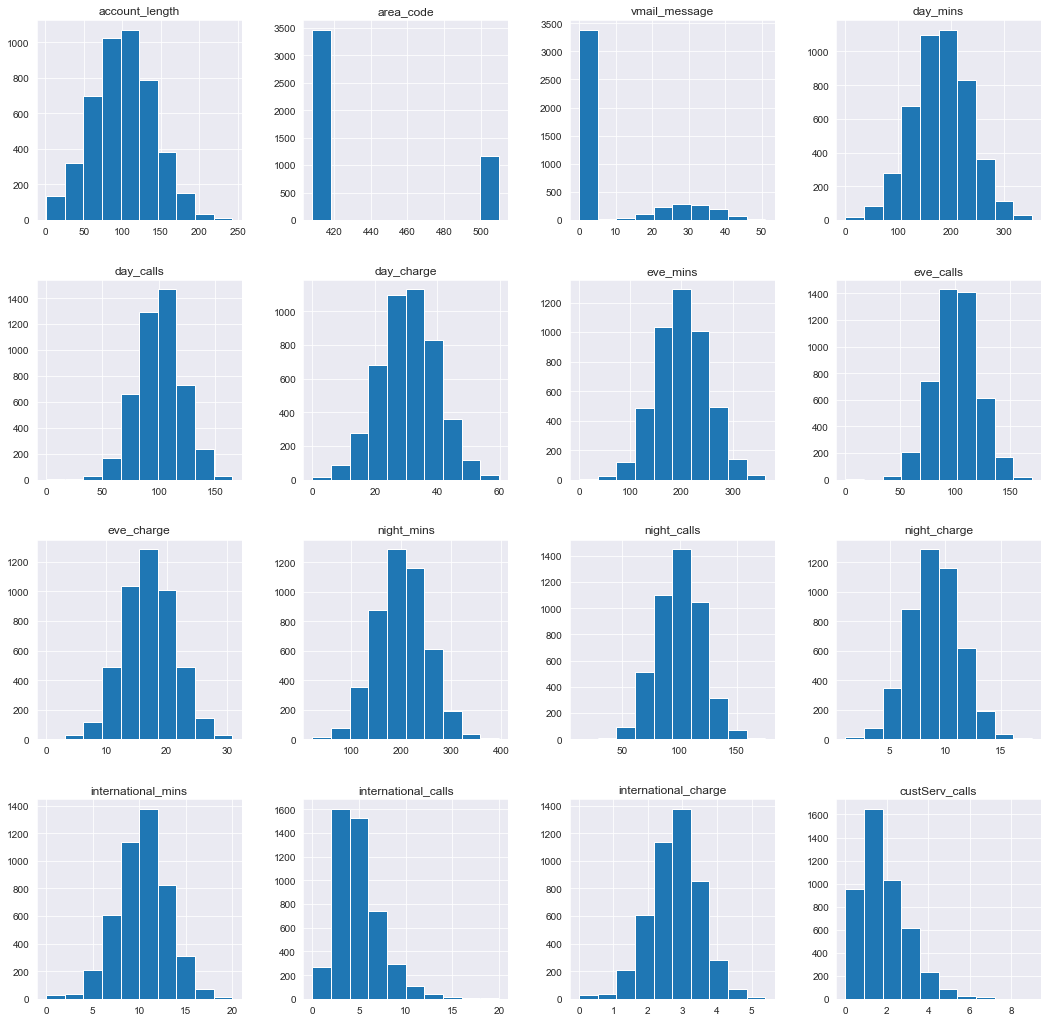

In [50]:
df.hist(figsize=(18,18));

- Almost all the numerical columns are normally distributed.